# Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# para fazer mapas/dados geolocalizados
#!pip install geopandas
import geopandas as gpd
#!pip install seaborn
import seaborn as sns

## Importação do Banco de Dados

Foi utilizado o arquivo compactado para diminuir o tamanho do arquivo utilizado.

In [2]:
# importar localmente
df_enem = pd.read_csv('MICRODADOS_ENEM_2022_REDUZIDO.zip',
                      encoding = 'latin1')

Visualização do Banco de Dados

In [3]:
df_enem

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,SG_UF_ESC,SG_UF_PROVA,...,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q006
0,14,M,2,2,1,2,1,0,NaN,DF,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,B
1,14,M,2,1,1,16,1,0,NaN,DF,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,Q
2,5,F,1,2,1,2,1,0,NaN,BA,...,1,1,1,421.1,546.0,498.8,565.3,1,760.0,B
3,6,M,1,3,1,2,1,0,NaN,ES,...,1,1,1,490.7,388.6,357.8,416.0,1,320.0,A
4,4,M,0,3,1,1,1,0,NaN,PA,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,3,M,1,1,2,0,2,0,NaN,SP,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,F
3476101,14,F,2,1,2,0,2,0,PE,PE,...,0,0,0,NaN,NaN,NaN,NaN,1,NaN,B
3476102,2,M,1,1,2,0,2,0,SC,SC,...,1,1,1,527.9,627.0,583.3,637.1,0,660.0,G
3476103,3,M,1,3,2,0,3,0,SP,SP,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,E


Informações sobre as colunas do dataframe

In [4]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP_FAIXA_ETARIA  int64  
 1   TP_SEXO          object 
 2   TP_ESTADO_CIVIL  int64  
 3   TP_COR_RACA      int64  
 4   TP_ST_CONCLUSAO  int64  
 5   TP_ANO_CONCLUIU  int64  
 6   TP_ESCOLA        int64  
 7   IN_TREINEIRO     int64  
 8   SG_UF_ESC        object 
 9   SG_UF_PROVA      object 
 10  TP_PRESENCA_CN   int64  
 11  TP_PRESENCA_CH   int64  
 12  TP_PRESENCA_LC   int64  
 13  TP_PRESENCA_MT   int64  
 14  NU_NOTA_CN       float64
 15  NU_NOTA_CH       float64
 16  NU_NOTA_LC       float64
 17  NU_NOTA_MT       float64
 18  TP_LINGUA        int64  
 19  NU_NOTA_REDACAO  float64
 20  Q006             object 
dtypes: float64(5), int64(12), object(4)
memory usage: 556.9+ MB


# Tratamento dos dados

In [4]:
vc_cn = df_enem['TP_PRESENCA_CN'].value_counts().reset_index()
vc_mt = df_enem['TP_PRESENCA_MT'].value_counts().reset_index()

vc_ch = df_enem['TP_PRESENCA_CH'].value_counts().reset_index()
vc_lc = df_enem['TP_PRESENCA_LC'].value_counts().reset_index()


#Renomeando as colunas para criar df
vc_cn.columns = ['TP_PRESENCA_CN', 'Count_CN']
vc_mt.columns = ['TP_PRESENCA_MT', 'Count_MT']

vc_ch.columns = ['TP_PRESENCA_CH', 'Count_CH']
vc_lc.columns = ['TP_PRESENCA_LC', 'Count_LC']

# Mescla os DataFrames com base nas colunas 'TP_PRESENCA_CN' e 'TP_PRESENCA_CH'
resultado_cn_mt = pd.merge(vc_cn, vc_mt, how='outer', left_on='TP_PRESENCA_CN', right_on='TP_PRESENCA_MT')
resultado_ch_lc = pd.merge(vc_ch, vc_lc, how='outer', left_on='TP_PRESENCA_CH', right_on='TP_PRESENCA_LC')

print(resultado_cn_mt)
print(resultado_ch_lc)

   TP_PRESENCA_CN  Count_CN  TP_PRESENCA_MT  Count_MT
0               1   2355395               1   2355395
1               0   1119133               0   1119133
2               2      1577               2      1577
   TP_PRESENCA_CH  Count_CH  TP_PRESENCA_LC  Count_LC
0               1   2493442               1   2493442
1               0    977981               0    977981
2               2      4682               2      4682


Os resultados das contagens sugerem que o TP_PRESENCA_CN E O TP_PRESENCA_MT contenham os mesmos dados.
Os mesmo pode ser dito a respeito de TP_PRESENCA_CH E TP_PRESENCA_LC. LOGO:

**Legenda Presença**

CÓDIGO | SIGNIFICADO
-------|-------------
0      | Faltou
1      | Presente
2      | Eliminado


In [5]:
soma = df_enem['TP_PRESENCA_MT'] + df_enem['TP_PRESENCA_CN']
soma.value_counts()


2    2355395
0    1119133
4       1577
Name: count, dtype: int64

### Logo quem faltou na prova MT também faltou na prova CN

In [6]:
soma2 = df_enem['TP_PRESENCA_CH'] + df_enem['TP_PRESENCA_LC']
soma2.value_counts()


2    2493442
0     977981
4       4682
Name: count, dtype: int64

### Logo quem faltou na prova CH também faltou na prova LC

In [7]:
#Substituindo 4 colunas de presença por 2, pois são 2 dias de prova
df_enem.drop(['TP_PRESENCA_CH', 'TP_PRESENCA_MT'], axis=1, inplace=True)
df_enem.rename(columns={'TP_PRESENCA_CN': 'PRESENCA_CN_E_MT'}, inplace=True)
df_enem.rename(columns={'TP_PRESENCA_LC': 'PRESENCA_LC_E_CH'}, inplace=True)

# Renomeando a coluna de renda
df_enem.rename(columns={'Q006': 'RENDA_MENSAL'}, inplace=True)

## Criação dos dicionarios para as categorias do banco de dados

In [ ]:
TP_FAIXA_ETARIA = {1:'Menor de 17 anos',
2:'17 anos',
3:'18 anos',
4:'19 anos',
5:'20 anos',
6:'21 anos',
7:'22 anos',
8:'23 anos',
9:'24 anos',
10:'25 anos',
11:'Entre 26 e 30 anos',
12:'Entre 31 e 35 anos',
13:'Entre 36 e 40 anos',
14:'Entre 41 e 45 anos',
15:'Entre 46 e 50 anos',
16:'Entre 51 e 55 anos',
17:'Entre 56 e 60 anos',
18:'Entre 61 e 65 anos',
19:'Entre 66 e 70 anos',
20:'Maior de 70 anos'}

TP_ESTADO_CIVIL = {0: 'Não informado',
1:'Solteiro(a)',
2:'Casado(a)/Mora com companheiro(a)',
3:'Divorciado(a)/Desquitado(a)/Separado(a)',
4:'Viúvo(a)'}

TP_COR_RACA = {0:'Não declarado',
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela',
5:'Indígena ',
6:'Não dispõe da informação'}

TP_NACIONALIDADE = {0:'Não informado',
1:'Brasileiro(a)',
2:'Brasileiro(a) Naturalizado(a)',
3:'Estrangeiro(a)',
4:'Brasileiro(a) Nato(a), nascido(a) no exterior'}

TP_ST_CONCLUSAO = {1:'Já concluí o Ensino Médio',
2:'Estou cursando e concluirei o Ensino Médio em 2022',
3:'Estou cursando e concluirei o Ensino Médio após 2022',
4:'Não concluí e não estou cursando o Ensino Médio'}

TP_ANO_CONCLUIU = {0:'Não informado',
1:'2021',
2:'2020',
3:'2019',
4:'2018',
5:'2017',
6:'2016',
7:'2015',
8:'2014',
9:'2013',
10:'2012',
11:'2011',
12:'2010',
13:'2009',
14:'2008',
15:'2007',
16:'Antes de 2007'}


TP_ESCOLA = { 1:'Não Respondeu', 2:'Pública', 3:'Privada'}

TP_ENSINO = {1:'Ensino Regular', 2:'Educação Especial - Modalidade Substitutiva'}


IN_TREINEIRO = {1:'Sim', 0:'Não'}

# Análise Descritiva dos dados

## Presença nos dois dias de prova

In [8]:
df_enem['PRESENCA_LC_E_CH'].replace(0, 'Faltou', inplace=True)
df_enem['PRESENCA_LC_E_CH'].replace(1, 'Presente', inplace=True)
df_enem['PRESENCA_LC_E_CH'].replace(2, 'Eliminado', inplace=True)

In [9]:
df_enem['PRESENCA_LC_E_CH'].value_counts()

PRESENCA_LC_E_CH
Presente     2493442
Faltou        977981
Eliminado       4682
Name: count, dtype: int64

In [10]:
percentual_presenca_lc_ch = df_enem['PRESENCA_LC_E_CH'].value_counts(normalize=True)*100

In [10]:
df_enem['PRESENCA_CN_E_MT'].replace(0, 'Faltou', inplace=True)
df_enem['PRESENCA_CN_E_MT'].replace(1, 'Presente', inplace=True)
df_enem['PRESENCA_CN_E_MT'].replace(2, 'Eliminado', inplace=True)

In [11]:
df_enem['PRESENCA_CN_E_MT'].value_counts()

PRESENCA_CN_E_MT
1    2355395
0    1119133
2       1577
Name: count, dtype: int64

In [12]:
percentual_presenca_cn_mt = df_enem['PRESENCA_CN_E_MT'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Presença 1º dia dos inscritos no ENEM - 2022')

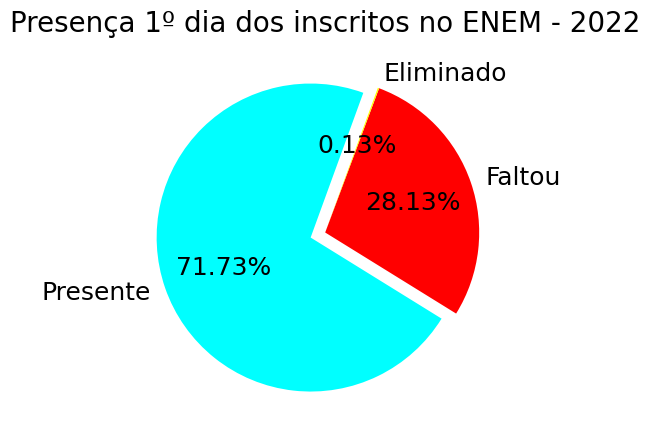

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
labels = ("Presente", "Faltou", "Eliminado")
explode = (0.10, 0, 0) #distâncias entre as fatias
ax.pie(percentual_presenca_lc_ch,
       labels=labels,
       autopct="%.2f%%",
       shadow=False,
       explode=explode,
       startangle=70,
       colors=["cyan", "red", "yellow"],
       textprops={'fontsize': 18})
ax.set_title('Presença 1º dia dos inscritos no ENEM - 2022', fontsize=20)

Text(0.5, 1.0, 'Presença 2º dia dos inscritos no ENEM - 2022')

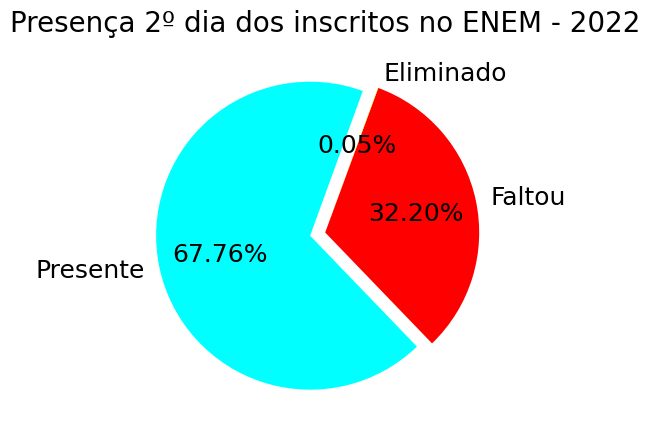

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
labels = ("Presente", "Faltou", "Eliminado")
explode = (0.10, 0, 0) #distâncias entre as fatias
ax.pie(percentual_presenca_cn_mt,
       labels=labels,
       autopct="%.2f%%",
       shadow=False,
       explode=explode,
       startangle=70,
       colors=["cyan", "red", "yellow"],
       textprops={'fontsize': 18})
ax.set_title('Presença 2º dia dos inscritos no ENEM - 2022', fontsize=20)

## Notas obtidas no exame



In [14]:
df_enem[['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,421.1,546.0,498.8,565.3,760.0
3,490.7,388.6,357.8,416.0,320.0
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3476100,NaN,NaN,NaN,NaN,NaN
3476101,NaN,NaN,NaN,NaN,NaN
3476102,527.9,627.0,583.3,637.1,660.0
3476103,NaN,NaN,NaN,NaN,NaN


**Há muitos valores NaN nas notas que precisarão ser tratados**

In [15]:
# Renomeando as colunas de notas das provas

df_enem.rename(columns={'NU_NOTA_CN':'Ciencias Naturais',
                                 'NU_NOTA_CH':'Ciencias Humanas',
                                 'NU_NOTA_LC': 'Linguagem e Código',
                                 'NU_NOTA_MT': 'Matemática',
                                 'NU_NOTA_REDACAO':'Redação' },inplace=True)

In [16]:
notas = ['Ciencias Naturais', 'Ciencias Humanas','Linguagem e Código', 'Matemática','Redação']
descritivo_notas  = df_enem[notas].describe()
descritivo_notas

,Ciencias Naturais,Ciencias Humanas,Linguagem e Código,Matemática,Redação
count,2.355395e+06,2.493442e+06,2.493442e+06,2.355395e+06,2.493442e+06
mean,4.959305e+02,5.269531e+02,5.174389e+02,5.425032e+02,6.184797e+02
std,7.200975e+01,8.148446e+01,7.755491e+01,1.160225e+02,2.122125e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.405000e+02,4.770000e+02,4.684000e+02,4.490000e+02,5.200000e+02
50%,4.856000e+02,5.299000e+02,5.255000e+02,5.308000e+02,6.200000e+02
75%,5.433000e+02,5.819000e+02,5.732000e+02,6.224000e+02,7.600000e+02
max,8.753000e+02,8.392000e+02,8.010000e+02,9.857000e+02,1.000000e+03


Text(0.5, 0, 'Blocos de Conhecimento')

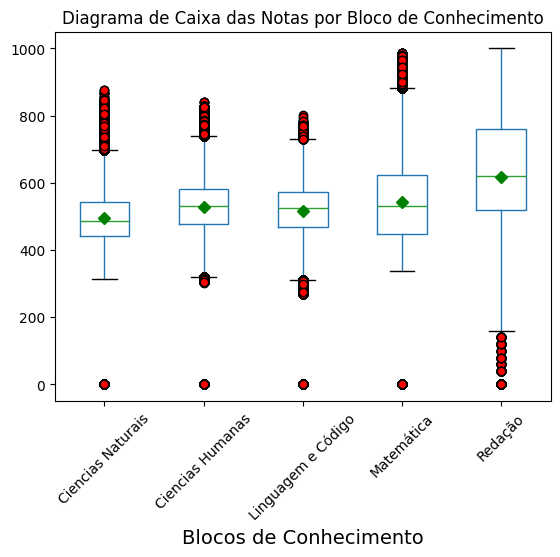

In [20]:
plt.title("Diagrama de Caixa das Notas por Bloco de Conhecimento")
#plt.boxplot(df_enem[notas], patch_artist=True, labels=['Ciencias Humanas','Linguagem e Código','Matemática','Redação'])
#plt.show()
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
gboxplot = df_enem.boxplot(column = notas,
                          flierprops=red_circle,showmeans=True, meanprops=mean_shape, rot=45)
gboxplot.grid(False)
gboxplot.set_xlabel('Blocos de Conhecimento', fontsize=14)

- Os outliers inferiores das provas objetivas ocorreram quando o aluno zerou a prova.
- A redação foi a prova com a maior dispersão de dados.
- As notas de ciências humanas tem mediana próxima a média, isso significa que a distribuição dos dados é simétrica. A média próxima da mediana significa que a maioria dos alunos teve notas semelhantes. Ou seja, não houve muitos alunos com notas muito altas ou muito baixas.
- Nas notas da prova de linguagem e código, podemos observar que o tamanho da caixa é menos, isso indica que a maioria dos alunos teve notas semelhantes, próximo a mediana.
- Na prova de matemática, podemos observar maior dispersão dos dados maiores que a mediana em relação as notas menores que a mediana.

## Distribuição de acordo com o sexo na realização da prova (M - masculino / F - Feminino)

In [21]:
df_enem['TP_SEXO'].unique()

array(['M', 'F'], dtype=object)

In [22]:
df_enem['TP_SEXO'].value_counts()

TP_SEXO
F    2120519
M    1355586
Name: count, dtype: int64

In [23]:
df_enem['TP_SEXO'].value_counts(normalize=True)*100

TP_SEXO
F    61.002732
M    38.997268
Name: proportion, dtype: float64

In [24]:
insc_p_sexo = df_enem['TP_SEXO'].value_counts(normalize=True)*100

In [25]:
insc_p_sexo

TP_SEXO
F    61.002732
M    38.997268
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Gênero dos inscritos no ENEM - 2022')

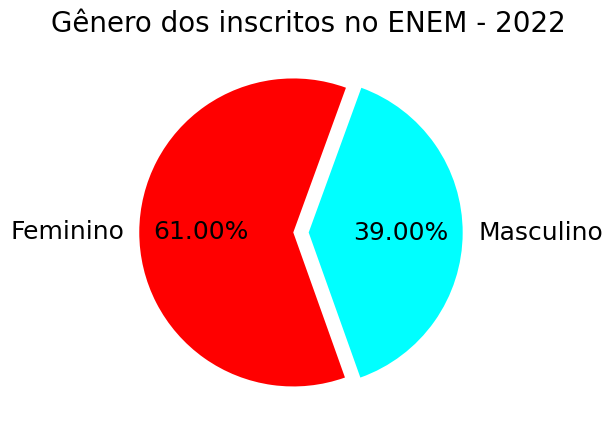

In [26]:
fig, ax = plt.subplots(figsize=(12, 5))
labels = ("Feminino", "Masculino")
explode = (0.10, 0) #distâncias entre as fatias
ax.pie(insc_p_sexo,
       labels=labels,
       autopct="%.2f%%",
       shadow=False,
       explode=explode,
       startangle=70,
       colors=["red", "cyan"],
       textprops={'fontsize': 18})
ax.set_title('Gênero dos inscritos no ENEM - 2022', fontsize=20)

Podemos observar que a maioria dos inscritos são do sexo feminino, o que está de acordo com as estatística da população brasileira.

[Pirâmide Etária do Brasil - IBGE](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18318-piramide-etaria.html)

## Pirâmide Etária

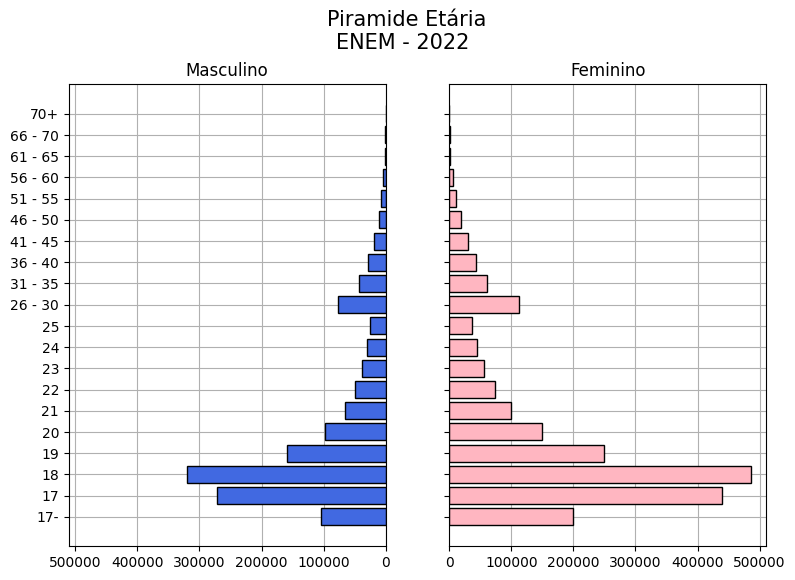

In [47]:
# separando o dataset em homens e mulheres
insc_F = df_enem[df_enem['TP_SEXO'] == 'F']
insc_M = df_enem[df_enem['TP_SEXO'] == 'M']

#from pandas.api.types import CategoricalDtype
#separando por faixa Etária
insc_F_idade = insc_F["TP_FAIXA_ETARIA"].value_counts()
insc_M_idade = insc_M["TP_FAIXA_ETARIA"].value_counts()

insc_F_idade = insc_F_idade.to_frame() # convertendo a série em df
insc_M_idade = insc_M_idade.to_frame() # convertendo a série em df

#add name index
insc_F_idade.index.name = 'Age'
insc_M_idade.index.name = 'Age'

insc_F_idade.reset_index(inplace=True)
insc_M_idade.reset_index(inplace=True)

insc_F_idade.rename(columns={'Age': 'Idade', 'count': 'Feminino'}, inplace=True)
insc_M_idade.rename(columns={'Age': 'Idade', 'count': 'Masculino'}, inplace=True)

insc_F_idade = insc_F_idade.sort_values(by='Idade')
insc_M_idade = insc_M_idade.sort_values(by='Idade')

insc_fx_etaria = insc_M_idade.join(insc_F_idade["Feminino"])

#informação presente no dicionário disponibilizado pelo governo junto ao dataset
insc_fx_etaria["Faixa Etária"] = ["17-", "17", "18", "19", "20", "21", "22" ,"23", "24", "25", "26 - 30", "31 - 35", "36 - 40", "41 - 45", "46 - 50", "51 - 55", "56 - 60", "61 - 65", "66 - 70", "70+"]

y = range(0, len(insc_fx_etaria))
x_male = insc_fx_etaria['Masculino']
x_female = insc_fx_etaria['Feminino']

x_max = max(x_female.max(),x_male.max())*1.05 #x_max é um pouco maior que o valor mais alto
#ambos os gráficos com a mesma escala

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6)) #subplot com dois gráficos, cada um em uma coluna

#specify background color and plot title
#fig.patch.set_facecolor('xkcd:white') #muda cor do fundo
plt.figtext(.5,.9,"Piramide Etária\nENEM - 2022 \n", fontsize=15, ha='center')
    
#construindo os gráficos
# axes[0] -> gráfico da esqueda (masculino)
axes[0].barh(y, x_male, align='center', color='royalblue',edgecolor = 'black')
axes[0].set(title='Masculino')
axes[0].set_xlim([0, x_max])

#axes[1] -> grafico da direita (feminino)
axes[1].barh(y, x_female, align='center', color='lightpink',edgecolor = 'black')
axes[1].set(title='Feminino')
axes[1].set_xlim([0, x_max])

#adjust grid parameters and specify labels for y-axis
axes[0].grid() #inserindo o grid
axes[0].set_axisbelow(True) #colocando o grid atrás das barras
axes[0].set(yticks=y, yticklabels=insc_fx_etaria['Faixa Etária']) #posição das linhas do grid
axes[0].invert_xaxis() #invertendo o primeiro gráfico para ficar espelhado
axes[1].grid() #inserindo o grid
axes[1].set_axisbelow(True) #colocando o grid atrás das barras

## Distribuição de acordo com o estado civil

CÓDIGO | SIGNIFICADO
-------|-------------
1      | Solteiro(a)
2      | Casado(a)/Mora com companheiro(a)
3      | Divorciado(a)/Desquitado(a)/Separado(a)
4      | Viúvo(a)
0      | Não Informado

In [30]:
df_enem['TP_ESTADO_CIVIL'].replace(0, 'Não Informado', inplace=True)
df_enem['TP_ESTADO_CIVIL'].replace(1, 'Solteiro(a)', inplace=True)
df_enem['TP_ESTADO_CIVIL'].replace(2, 'Casado(a)', inplace=True)
df_enem['TP_ESTADO_CIVIL'].replace(3, 'Divorciado(a)', inplace=True)
df_enem['TP_ESTADO_CIVIL'].replace(4, 'Viúvo(a)', inplace=True)

In [31]:
df_enem['TP_ESTADO_CIVIL'].value_counts()

TP_ESTADO_CIVIL
Solteiro(a)      3127949
Casado(a)         165719
Não Informado     128493
Divorciado(a)      50380
Viúvo(a)            3564
Name: count, dtype: int64

In [32]:
percentual_estado_civil = df_enem['TP_ESTADO_CIVIL'].value_counts(normalize=True)*100
percentual_estado_civil

TP_ESTADO_CIVIL
Solteiro(a)      89.984307
Casado(a)         4.767376
Não Informado     3.696465
Divorciado(a)     1.449323
Viúvo(a)          0.102529
Name: proportion, dtype: float64

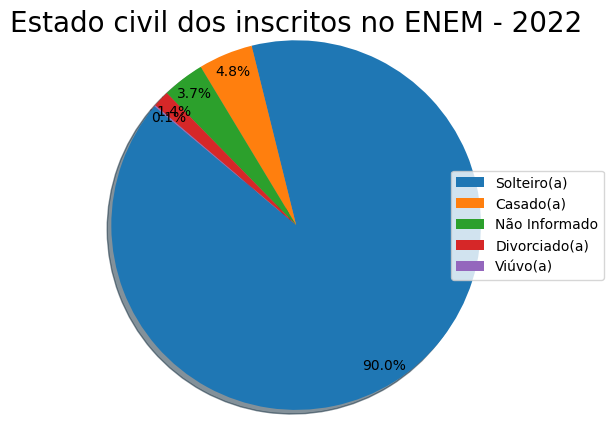

In [33]:
labels = ("Solteiro(a)", "Casado(a)", "Não Informado", "Divorciado(a)", "Viúvo(a)")
explode = (0, 0, 0, 0, 0)

fig, ax = plt.subplots()
ax.pie(percentual_estado_civil, 
        explode=explode, 
        #labels=labels, 
        autopct='%1.1f%%',
        pctdistance=.9,  
        shadow=True, 
        startangle=140,
        radius=1.25
        )
ax.set_title('Estado civil dos inscritos no ENEM - 2022', fontsize=20)
ax.legend(labels, loc="center left",
          bbox_to_anchor=(.9, 0, 0.5, 1))

## Distribuição de acordo com a raça/cor

In [34]:
df_enem['TP_COR_RACA'].unique()
#TP_COR_RACA

array([2, 1, 3, 5, 0, 4], dtype=int64)

**Cor/Raça**

CÓDIGO | SIGNIFICADO
-------|-------------
0      | Não declarado
1      | Branca
2      | Preta
3      | Parda
4      | Amarela
5      | Indígena


In [35]:
df_enem['TP_COR_RACA'].replace(0, 'Não Informado', inplace=True)
df_enem['TP_COR_RACA'].replace(1, 'Branca', inplace=True)
df_enem['TP_COR_RACA'].replace(2, 'Preta', inplace=True)
df_enem['TP_COR_RACA'].replace(3, 'Parda', inplace=True)
df_enem['TP_COR_RACA'].replace(4, 'Amarela', inplace=True)
df_enem['TP_COR_RACA'].replace(5, 'Indígena', inplace=True)

In [36]:
df_enem['TP_COR_RACA'].value_counts()

TP_COR_RACA
Parda            1488844
Branca           1428081
Preta             408422
Amarela            66051
Não Informado      64867
Indígena           19840
Name: count, dtype: int64

In [37]:
percentual_raca = df_enem['TP_COR_RACA'].value_counts(normalize=True)*100
percentual_raca

TP_COR_RACA
Parda            42.830812
Branca           41.082792
Preta            11.749415
Amarela           1.900144
Não Informado     1.866083
Indígena          0.570754
Name: proportion, dtype: float64

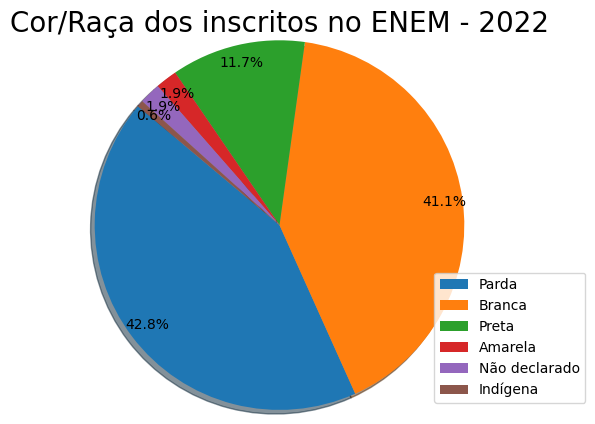

In [39]:
labels = ("Parda", "Branca", "Preta", "Amarela", "Não declarado", "Indígena")
explode = (0, 0, 0, 0, 0, 0)

fig, ax = plt.subplots()
ax.pie(percentual_raca, 
        explode=explode, 
        #labels=labels, 
        autopct='%1.1f%%',
        pctdistance=.9,  
        shadow=True, 
        startangle=140,
        radius=1.25
        )
ax.set_title('Cor/Raça dos inscritos no ENEM - 2022', fontsize=20)
ax.legend(labels, loc="lower left",
          bbox_to_anchor=(.9, 0, 0.5, 1))

## Distribuição de acordo com a **Situação de Conclusão Escolar**

CÓDIGO | SIGNIFICADO
-------|-------------
1      | Já concluí o Ensino Médio
2      | Estou cursando e concluirei o Ensino Médio em 2022
3      | Estou cursando e concluirei o Ensino Médio após 2022
4      | Não concluí e não estou cursando o Ensino Médio

In [30]:
df_enem['TP_ST_CONCLUSAO'].replace(1, 'Concluído', inplace=True)
df_enem['TP_ST_CONCLUSAO'].replace(2, 'Conclusão em 2022', inplace=True)
df_enem['TP_ST_CONCLUSAO'].replace(3, 'Conclusão após 2022', inplace=True)
df_enem['TP_ST_CONCLUSAO'].replace(4, 'Não concluído e não cursando o EM', inplace=True)

In [31]:
percentual_conclusao = df_enem['TP_ST_CONCLUSAO'].value_counts(normalize=True)*100
percentual_conclusao

TP_ST_CONCLUSAO
Concluído                            46.985146
Conclusão em 2022                    37.903343
Conclusão após 2022                  14.750187
Não concluído e não cursando o EM     0.361324
Name: proportion, dtype: float64

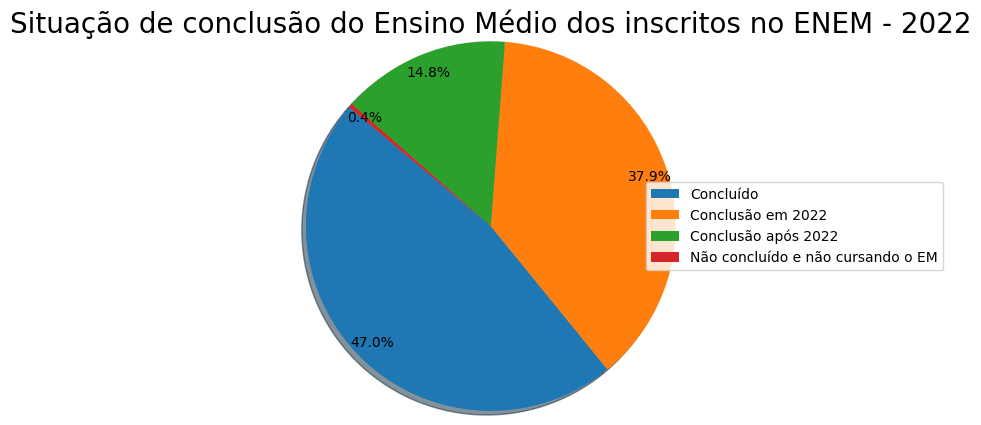

In [32]:
labels = ("Concluído", "Conclusão em 2022", "Conclusão após 2022", "Não concluído e não cursando o EM")
explode = (0, 0, 0, 0)

fig, ax = plt.subplots()
ax.pie(percentual_conclusao, 
        explode=explode, 
        #labels=labels, 
        autopct='%1.1f%%',
        pctdistance=.9,  
        shadow=True, 
        startangle=140,
        radius=1.25
        )
ax.set_title('Situação de conclusão do Ensino Médio dos inscritos no ENEM - 2022', fontsize=20)
ax.legend(labels, loc="center left",
          bbox_to_anchor=(.9, 0, 0.5, 1))

In [33]:
#Calcula média das notas e agrupa pela Situação de Conclusão Escolar
media_notas_por_conclusao = df_enem.groupby('TP_ST_CONCLUSAO').agg({
    'Ciencias Naturais': 'mean',
    'Ciencias Humanas': 'mean',
    'Linguagem e Código': 'mean',
    'Matemática': 'mean',
    'Redação': 'mean'
}).reset_index()

print(media_notas_por_conclusao)

                     TP_ST_CONCLUSAO  Ciencias Naturais  Ciencias Humanas  \
0                Conclusão após 2022         489.571212        524.910554   
1                  Conclusão em 2022         491.073111        519.673441   
2                          Concluído         503.707716        535.248391   
3  Não concluído e não cursando o EM         472.769500        503.880299   

   Linguagem e Código  Matemática     Redação  
0          518.112674  545.103612  628.177176  
1          510.159225  536.173908  611.314072  
2          524.507586  547.768604  621.744533  
3          497.045257  527.923452  558.562253  


## Distribuição de acordo com o **Tipo Escolar**

CÓDIGO | SIGNIFICADO
-------|-------------
1      | Não respondeu
2      | Pública
3      | Privada

In [23]:
df_enem['TP_ESCOLA'].replace(1, 'Não Informado', inplace=True)
df_enem['TP_ESCOLA'].replace(2, 'Pública', inplace=True)
df_enem['TP_ESCOLA'].replace(3, 'Privada', inplace=True)

In [24]:
df_enem['TP_ESCOLA'].value_counts()

TP_ESCOLA
Não Informado    2158545
Pública          1105355
Privada           212205
Name: count, dtype: int64

In [19]:
percentual_tipo_escolar = df_enem['TP_ESCOLA'].value_counts(normalize=True)*100
percentual_tipo_escolar

TP_ESCOLA
Não Informado    62.096657
Pública          31.798665
Privada           6.104678
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Tipo de escola do Ensino Médio dos inscritos no ENEM - 2022')

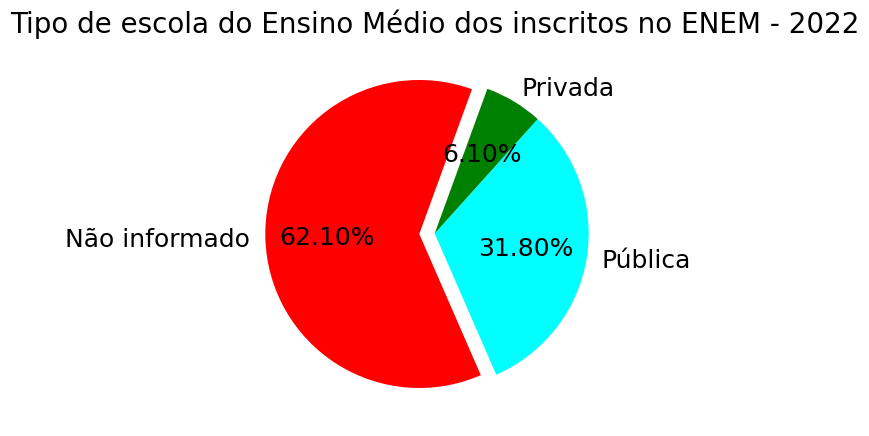

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))
labels = ("Não informado", "Pública", "Privada")
explode = (0.1, 0, 0) #distâncias entre as fatias
ax.pie(percentual_tipo_escolar,
       labels=labels,
       autopct="%.2f%%",
       shadow=False,
       explode=explode,
       startangle=70,
       colors=["red", "cyan", "green"],
       textprops={'fontsize': 18})
ax.set_title('Tipo de escola do Ensino Médio dos inscritos no ENEM - 2022', fontsize=20)

Observa-se que o tipo da escola não foi informado em mais da metade dos dados Esse dado pode trazer indicadores valiosos, especialmente para o sistema público de ensino brasileiro. Portanto, como melhoria para a análise sugere-se aprimorar a coleta desse dado.

### Média das notas por tipo da escola

In [21]:
#Calcula média das notas e agrupa pela Distribuição do Tipo Escolar
media_notas_por_conclusao = df_enem.groupby('TP_ESCOLA').agg({
    'Ciencias Naturais': 'mean',
    'Ciencias Humanas': 'mean',
    'Linguagem e Código': 'mean',
    'Matemática': 'mean',
    'Redação': 'mean'
}).reset_index()

print(media_notas_por_conclusao)

       TP_ESCOLA  Ciencias Naturais  Ciencias Humanas  Linguagem e Código  \
0  Não Informado         499.276123        531.917050          522.402837   
1        Privada         538.336001        572.703436          557.956392   
2        Pública         478.867296        506.533615          498.315994   

   Matemática     Redação  
0  546.862608  623.365812  
1  615.535160  751.272068  
2  515.678573  576.635138  


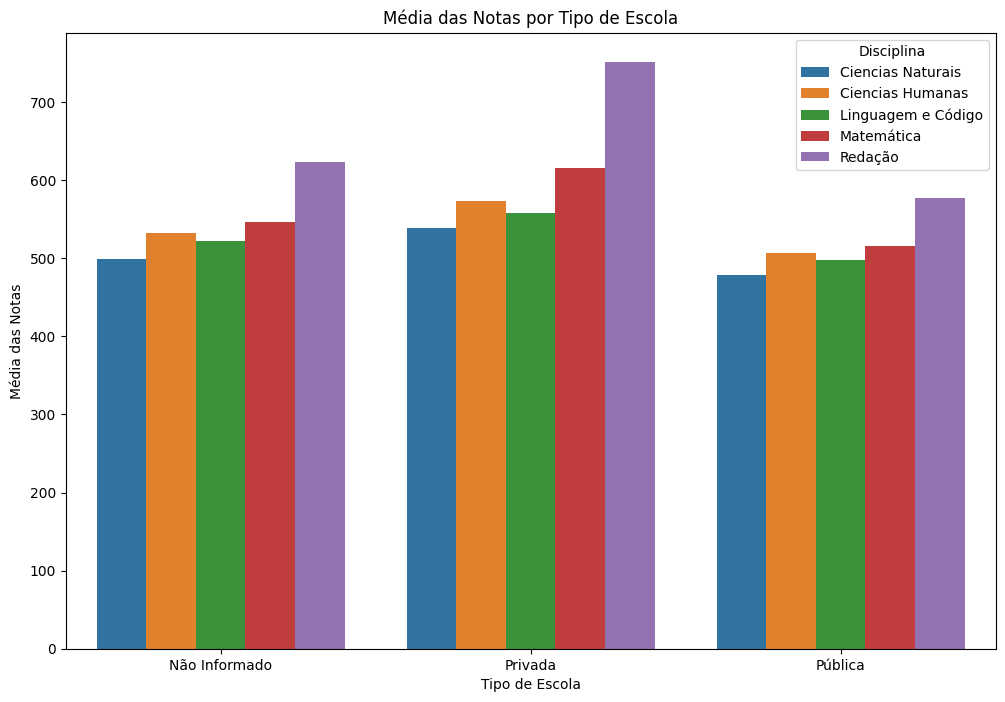

In [22]:
# Melt para facilitar o gráfico de barras
media_notas_melted = pd.melt(media_notas_por_conclusao, id_vars=['TP_ESCOLA'], var_name='Disciplina', value_name='Média')

# Plot usando o seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='TP_ESCOLA', y='Média', hue='Disciplina', data=media_notas_melted)
plt.xlabel('Tipo de Escola')
plt.ylabel('Média das Notas')
plt.title('Média das Notas por Tipo de Escola')
plt.show()

Concluímos que estudantes de escolas privadas obtiveram uma nota média maior no ENEM 2022 em comparação com os estudantes de escolas públicas. As maires discrepância foram nas notas de redação e matemática, respectivamente

Essa disparidade pode indicar diferenças nos recursos educacionais que impactam o desempenho acadêmico.


## Distribuição de participantes por Estado

(-76.24759047174989, -26.590499411250004, -35.7023289475499, 7.222992030550026)

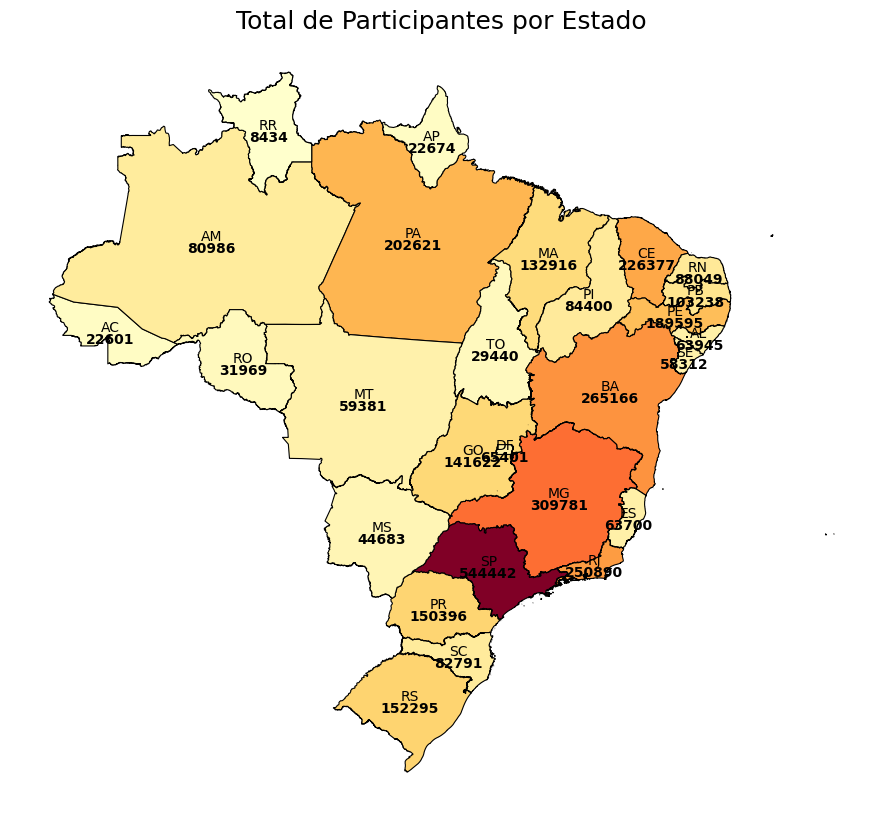

In [19]:
#importando o shapefile do brasil
infos_ufs = gpd.read_file('BR_UF_2022/BR_UF_2022.shp')
#SG_UF_ESC => Sigla da Unidade da Federação da escola
esc_p_UF = df_enem["SG_UF_PROVA"].value_counts() #quantidade por sigla
dict_esc_p_UF = esc_p_UF.to_dict() # convertendo para o tipo dicionário

#incluindo uma coluna de quantidade de participantes por sigla no df infos_ufs
infos_ufs['SG_UF_PROVA'] = infos_ufs['SIGLA_UF'].map(dict_esc_p_UF)

#mapa
fig, ax = plt.subplots(1, figsize = (20,10))
infos_ufs.plot(column = 'SG_UF_PROVA',
               ax=ax,
               cmap = 'YlOrRd',
               linewidth=0.8,
               figsize = (20,7),
               legend = False,
               edgecolor = 'black')
plt.title("Total de Participantes por Estado", fontsize = 18)
infos_ufs.apply(lambda x: ax.annotate(text=x.SIGLA_UF, xy=x.geometry.centroid.coords[0], ha='center', color = "black"), axis=1)
infos_ufs.apply(lambda x: ax.annotate(text=x.SG_UF_PROVA, xy=x.geometry.centroid.coords[0], xytext=(0,-12), textcoords='offset pixels', ha='center', color = "black", weight='semibold'), axis=1)
ax.axis('off')

## Distribuição da nota máxima de redação por Estado

(-76.24759047174989, -26.590499411250004, -35.7023289475499, 7.222992030550026)

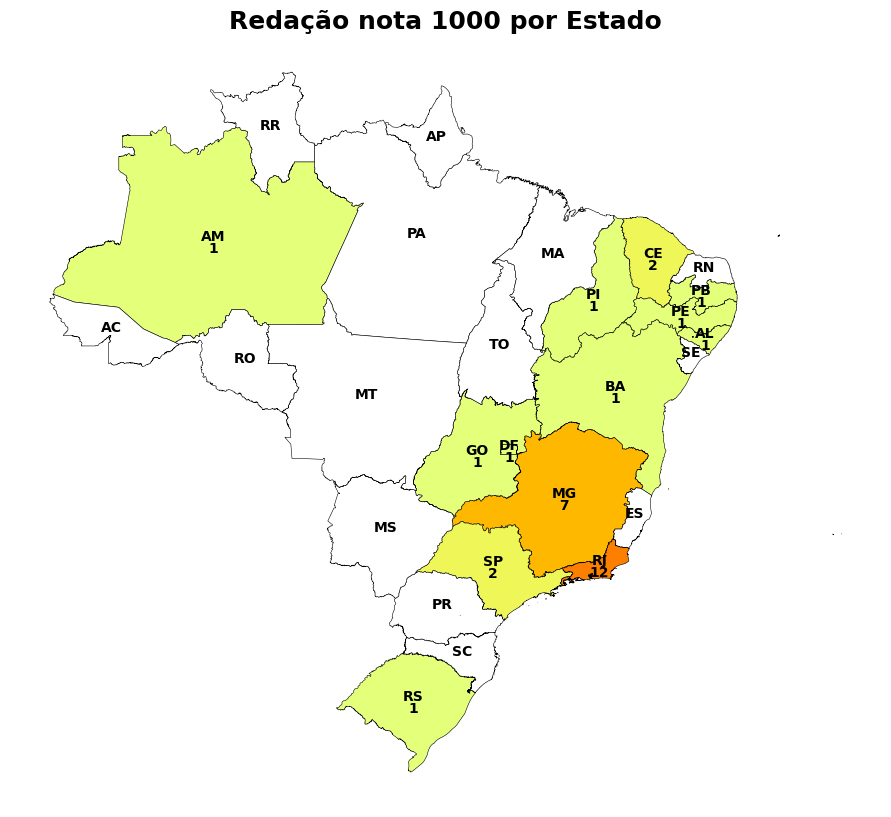

In [20]:
qtd_nota_1000_uf = df_enem[df_enem['Redação'] == 1000]['SG_UF_PROVA'].value_counts()
dict_qtd_nota_1000_uf = qtd_nota_1000_uf.to_dict() # convertendo para o tipo dicionário
infos_ufs['Redacao_1000'] = infos_ufs['SIGLA_UF'].map(dict_qtd_nota_1000_uf)

#infos_ufs['Redacao_1000'] = infos_ufs['Redacao_1000'].fillna(0) # preenchendo com zero os estados sem redações nota 1000

#mapa
fig, ax = plt.subplots(1, figsize = (20,10))
infos_ufs.plot(column = 'Redacao_1000',
               ax=ax,
               cmap = 'Wistia',
               linewidth=0.40,
               figsize = (20,7),
               legend = False,
               edgecolor = 'black',
               missing_kwds={
                 "color": "white",
                "edgecolor": "black"}
                ,
               )
plt.title("Redação nota 1000 por Estado", fontsize = 18, weight='semibold')
infos_ufs.apply(lambda x: ax.annotate(text=x.SIGLA_UF, xy=x.geometry.centroid.coords[0],
                                      ha='center', color = "black",
                                      weight='semibold'), axis=1)
infos_ufs.apply(lambda x: ax.annotate(text=f'{round(x.Redacao_1000)}' if not np.isnan(x.Redacao_1000) != 0 else '',
                                      xy=x.geometry.centroid.coords[0],
                                      xytext=(0,-12), textcoords='offset pixels', 
                                      ha='center', color = "black", weight='semibold'),
                                      axis=1)
ax.axis('off')

Dos quase 2,4 milhões de participantes do ENEM 2022, apenas 32 (0,001%) alcançaram a nota máxima na redação. Entre os estados, somente 12 estados brasileiros e o Distrito Federal tiveram estudantes que conquistaram a pontuação máxima (1000) nessa prova. Destaca-se a região Sudeste, que se sobressaiu com um total de 21 redações nota 1000, sendo o estado do Rio de Janeiro responsável por 12 dessas pontuações, representando 37,5%. A região do Nordeste também merece destaque, apresentando um índice de sete redações com nota máxima

## Distribuição da nota máxima de redação por Tipo de escola

In [25]:
qtd_nota_1000_tipo_escola = df_enem[df_enem['Redação'] == 1000]['TP_ESCOLA'].value_counts()
qtd_nota_1000_tipo_escola

TP_ESCOLA
Não Informado    24
Privada           7
Pública           1
Name: count, dtype: int64

Como foi observado na distribuição dos inscritos por tipo de escola, apenas 6,10% informaram estudar em escola privada. Apesar disso, 7 das 32 notas 1000 na redação foram de alunos de escola particular e apenas 1 de escola pública. 

## Renda

Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classe

CÓDIGO | SIGNIFICADO
-------|-------------
A	| Nenhuma Renda
B	| Até 1212,00
C	| De 1212,01 até 1818,00
D	| De 1818,01 até 2424,00
E	| De 2424,01 até 3030,00
F	| De 3030,01 até 3636,00
G	| De 3636,01 até 4848,00
H	| De 4848,01 até 6060,00
I	| De 6060,01 até 7272,00
J	| De 7272,01 até 8484,00
K	| De 8484,01 até 9696,00
L	| De 9696,01 até 10908,00
M	| De 10908,01 até 12120,00
N	| De 12120,01 até 14544,00
O	| De 14544,01 até 18180,00
P	| De 18180,01 até 24240,00
Q	| Acima de 24240,00


In [50]:
df_enem['RENDA_MENSAL'].unique()

array(['B', 'Q', 'A', 'C', 'D', 'E', 'G', 'F', 'H', 'I', 'K', 'L', 'J',
       'P', 'O', 'N', 'M'], dtype=object)

In [51]:
dic_renda = {'A':0, 'B':1212, 'C':1818, 'D':2424, 'E':3030, 'F':3636, 'G':4848, 'H':6060,
              'I':7272, 'J':8484, 'K':9696, 'L':10908, 'M':12120, 'N':14544, 'O':18180,
              'P':24240, 'Q':24241}


In [52]:
df_enem['RENDA_MENSAL'] = df_enem['RENDA_MENSAL'].replace(dic_renda)

In [53]:
df_enem['RENDA_MENSAL'].unique()

array([ 1212, 24241,     0,  1818,  2424,  3030,  4848,  3636,  6060,
        7272,  9696, 10908,  8484, 24240, 18180, 14544, 12120],
      dtype=int64)

In [54]:
frequencia_renda = pd.value_counts(df_enem['RENDA_MENSAL'])
percentual_renda = frequencia = pd.value_counts(df_enem['RENDA_MENSAL'],normalize = True)*100
percentual_renda = percentual_renda.round(2)

C:\Users\Adriely\AppData\Local\Temp\ipykernel_10524\2398427161.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia_renda = pd.value_counts(df_enem['RENDA_MENSAL'])
C:\Users\Adriely\AppData\Local\Temp\ipykernel_10524\2398427161.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual_renda = frequencia = pd.value_counts(df_enem['RENDA_MENSAL'],normalize = True)*100


Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [55]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia_renda, 'Porcentagem (%)': percentual_renda})
dist_freq_quantitativas_personalizadas.sort_index(ascending = True,inplace = True)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
RENDA_MENSAL,,
0,204475,5.88
1212,1022869,29.43
1818,584278,16.81
2424,414266,11.92
3030,276704,7.96
3636,158091,4.55
4848,194319,5.59
6060,188751,5.43
7272,78916,2.27


In [56]:
novos_indices = ['Superior R$ 24240,00','Até R$ 24240,00','Até R$ 18180,00',
                'Até R$ 14544,00','Até R$ 12120,00','Até R$ 10908,00','Até R$ 9696,00',
                'Até R$ 8484,00','Até R$ 7272,00','Até R$ 6060,00','Até R$ 4848,00',
                'Até R$ 3636,00','Até R$ 3030,00','Até R$ 2424,00','Até R$ 1818,00',
                'Até R$ 1212,00','Sem Renda']
novos_indices.reverse()

In [57]:
dist_freq_quantitativas_personalizadas.index = novos_indices
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
Sem Renda,204475,5.88
"Até R$ 1212,00",1022869,29.43
"Até R$ 1818,00",584278,16.81
"Até R$ 2424,00",414266,11.92
"Até R$ 3030,00",276704,7.96
"Até R$ 3636,00",158091,4.55
"Até R$ 4848,00",194319,5.59
"Até R$ 6060,00",188751,5.43
"Até R$ 7272,00",78916,2.27
"Até R$ 8484,00",54984,1.58


Text(0.5, 1.0, 'Percentual da Renda Mensal dos inscritos no ENEM - 2022')

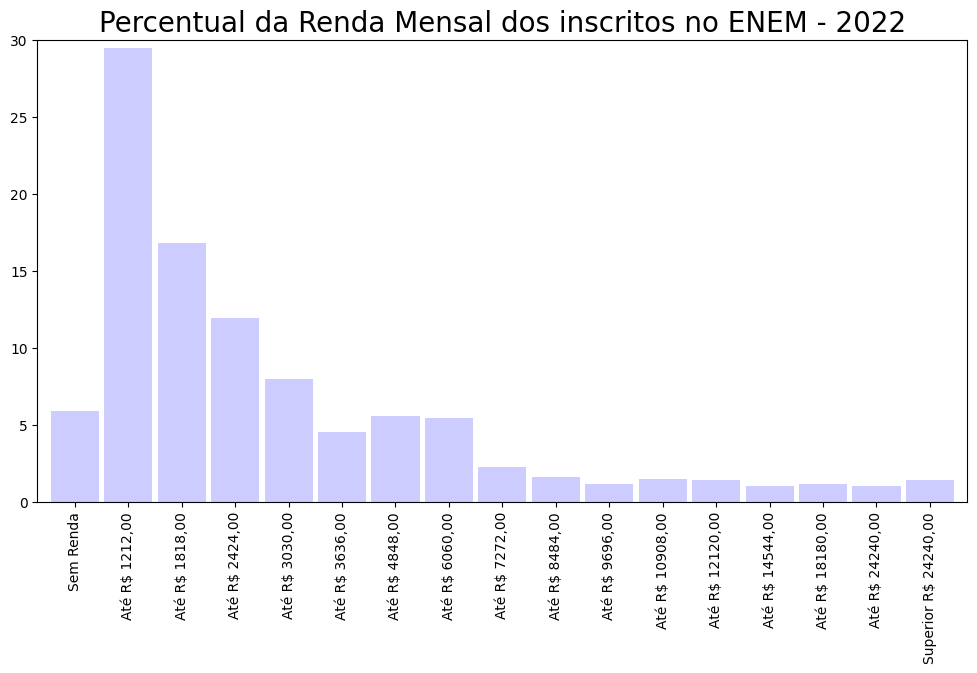

In [58]:
ax = dist_freq_quantitativas_personalizadas['Porcentagem (%)'].plot.bar(
    width   = 0.9,
    color   = 'blue',
    alpha   = 0.2,
    figsize = (12,6))
ax.set_ylim(0, 30)
ax.set_title('Percentual da Renda Mensal dos inscritos no ENEM - 2022', fontsize=20)


### Para aprofundar a análisa da variável RENDA MENSAL iremos considerar as seguintes classes em salários mínimos (SM)

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 1.212</b>.<br>
<font color='blue'>Fonte: LEI Nº 14.358, DE 1º DE JUNHO DE 2022 </font>

# Comparar Média do Enem com Renda e Grupo Étnico/Racial

Criação de uma tabela mantendo apenas as colunas com as notas de cada aluno

In [61]:
notas = df_enem[['Ciencias Humanas', 'Ciencias Naturais', 'Linguagem e Código', 'Matemática',
                 'Redação']].fillna(0)
notas

,Ciencias Humanas,Ciencias Naturais,Linguagem e Código,Matemática,Redação
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,546.0,421.1,498.8,565.3,760.0
3,388.6,490.7,357.8,416.0,320.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3476100,0.0,0.0,0.0,0.0,0.0
3476101,0.0,0.0,0.0,0.0,0.0
3476102,627.0,527.9,583.3,637.1,660.0
3476103,0.0,0.0,0.0,0.0,0.0


Cálculo da média

In [62]:
media_notas = notas.mean(axis=1)
media_notas

0            0.00
1            0.00
2          558.24
3          394.62
4            0.00
            ...  
3476100      0.00
3476101      0.00
3476102    607.06
3476103      0.00
3476104      0.00
Length: 3476105, dtype: float64

Junção da média com as informações de renda e étnicos/racial

In [63]:
tabela_c_ausentes = pd.DataFrame({'Média': media_notas, 'Renda': df_enem['RENDA_MENSAL'],
                                         'Cor ou Raça': df_enem['TP_COR_RACA'],
                                          'presenca1': df_enem['PRESENCA_CN_E_MT'], 
                                          'presenca2': df_enem['PRESENCA_LC_E_CH']})
tabela_c_ausentes

,Média,Renda,Cor ou Raça,presenca1,presenca2
0,0.00,1212,Preta,Faltou,Faltou
1,0.00,24241,Branca,Faltou,Faltou
2,558.24,1212,Preta,Presente,Presente
3,394.62,0,Parda,Presente,Presente
4,0.00,1212,Parda,Faltou,Faltou
...,...,...,...,...,...
3476100,0.00,3636,Branca,Faltou,Faltou
3476101,0.00,1212,Branca,Faltou,Faltou
3476102,607.06,4848,Branca,Presente,Presente
3476103,0.00,3030,Parda,Faltou,Faltou


Removendo os ausentes

In [64]:
tabela_media_renda_etnia = tabela_c_ausentes.loc[(tabela_c_ausentes['presenca1']=='Presente') & (tabela_c_ausentes['presenca2']=='Presente'),
                                            ['Média', 'Renda', 'Cor ou Raça']]
tabela_media_renda_etnia

,Média,Renda,Cor ou Raça
2,558.24,1212,Preta
3,394.62,0,Parda
7,414.10,1212,Preta
9,438.10,1212,Parda
11,576.70,1212,Branca
...,...,...,...
3476095,488.40,1818,Branca
3476097,617.92,2424,Preta
3476098,541.22,1212,Parda
3476099,507.22,1212,Branca


Foi necessário criar duas novas colunas para agrupar as rendas e as informações de cor e raça

In [65]:
# Coluna para Grupos étnicos/racial
tabela_media_renda_etnia['Grupo_Etnico'] = 'Outros'
tabela_media_renda_etnia.loc[tabela_media_renda_etnia['Cor ou Raça'].isin(['Preta', 'Parda', 'Indígena']), 'Grupo_Etnico'] = 'Pretas, Pardas e Indígenas'
tabela_media_renda_etnia.loc[tabela_media_renda_etnia['Cor ou Raça'] == 'Branca', 'Grupo_Etnico'] = 'Brancas'
tabela_media_renda_etnia

,Média,Renda,Cor ou Raça,Grupo_Etnico
2,558.24,1212,Preta,"Pretas, Pardas e Indígenas"
3,394.62,0,Parda,"Pretas, Pardas e Indígenas"
7,414.10,1212,Preta,"Pretas, Pardas e Indígenas"
9,438.10,1212,Parda,"Pretas, Pardas e Indígenas"
11,576.70,1212,Branca,Brancas
...,...,...,...,...
3476095,488.40,1818,Branca,Brancas
3476097,617.92,2424,Preta,"Pretas, Pardas e Indígenas"
3476098,541.22,1212,Parda,"Pretas, Pardas e Indígenas"
3476099,507.22,1212,Branca,Brancas


In [66]:
# Coluna para Grupos Renda
tabela_media_renda_etnia['Grupo_Rendas'] = 'Até R$1.212'
tabela_media_renda_etnia.loc[tabela_media_renda_etnia['Renda'].isin([1818, 2424, 3030]), 'Grupo_Rendas'] = 'Até R$3.030'
tabela_media_renda_etnia.loc[tabela_media_renda_etnia['Renda'].isin([3636, 4848, 6060]), 'Grupo_Rendas'] = 'Até R$6.060'
tabela_media_renda_etnia.loc[tabela_media_renda_etnia['Renda'].isin([7272, 8484, 9696]), 'Grupo_Rendas'] = 'Até R$9.696'
tabela_media_renda_etnia.loc[tabela_media_renda_etnia['Renda'].isin([10908, 12120, 14544]), 'Grupo_Rendas'] = 'Até R$14.544'
tabela_media_renda_etnia.loc[tabela_media_renda_etnia['Renda'].isin([18180, 24240]), 'Grupo_Rendas'] = 'Até R$24.240'
tabela_media_renda_etnia.loc[tabela_media_renda_etnia['Renda'] == 24241, 'Grupo_Rendas'] = 'Acima R$24.240'
tabela_media_renda_etnia

,Média,Renda,Cor ou Raça,Grupo_Etnico,Grupo_Rendas
2,558.24,1212,Preta,"Pretas, Pardas e Indígenas",Até R$1.212
3,394.62,0,Parda,"Pretas, Pardas e Indígenas",Até R$1.212
7,414.10,1212,Preta,"Pretas, Pardas e Indígenas",Até R$1.212
9,438.10,1212,Parda,"Pretas, Pardas e Indígenas",Até R$1.212
11,576.70,1212,Branca,Brancas,Até R$1.212
...,...,...,...,...,...
3476095,488.40,1818,Branca,Brancas,Até R$3.030
3476097,617.92,2424,Preta,"Pretas, Pardas e Indígenas",Até R$3.030
3476098,541.22,1212,Parda,"Pretas, Pardas e Indígenas",Até R$1.212
3476099,507.22,1212,Branca,Brancas,Até R$1.212


Criação do diagrama de caixas

In [67]:
#Para ordenar o gráfico
rendas = ['Até R$1.212', 'Até R$3.030','Até R$6.060','Até R$9.696', 
          'Até R$14.544','Até R$24.240', 'Acima R$24.240']

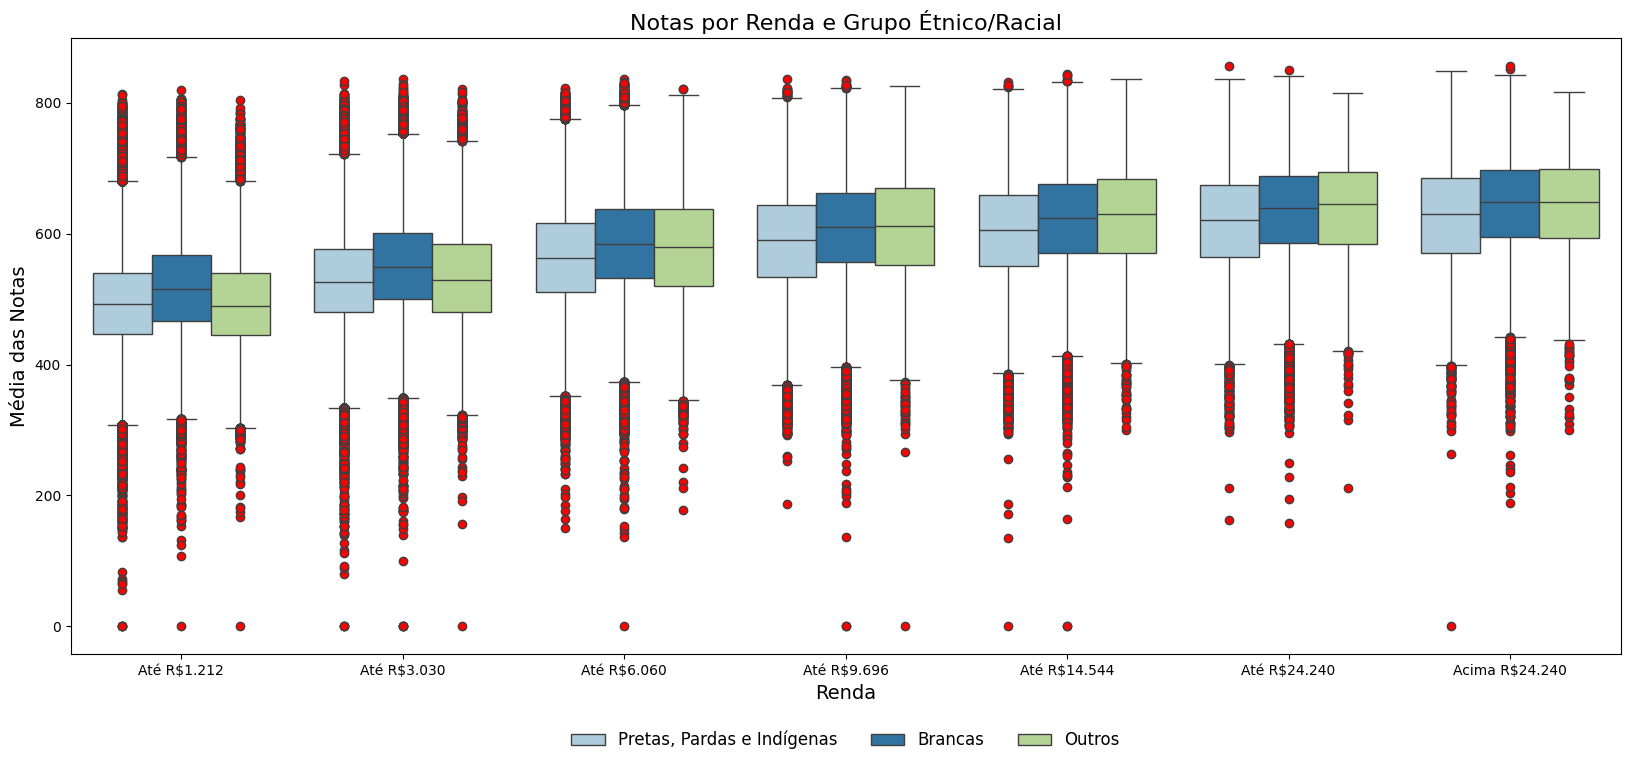

In [69]:
plt.figure(figsize=(20, 8))

red_circle = dict(markerfacecolor='red', marker='o')

sns.boxplot(x='Grupo_Rendas', y='Média', hue='Grupo_Etnico', data=tabela_media_renda_etnia,
            flierprops=red_circle, showmeans=False, meanline=False, palette='Paired', order=rendas)


# Ajustes visuais
plt.title("Notas por Renda e Grupo Étnico/Racial", fontsize=16)
plt.xlabel('Renda', fontsize=14)
plt.ylabel('Média das Notas', fontsize=14)

# Exibe a legenda fora do gráfico
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', frameon=False, ncol=4, fontsize=12)

# Exibe o gráfico
plt.show()

A análise visual revela padrões nas médias de notas do ENEM em relação à renda e etnia. Observa-se que pessoas de renda mais alta possuem médias mais altas. E que pessoas brancas possuem médias mais altas que os outros grupos étnicos, independente da renda familiar. E a presença de outliers realça valores atípicos, enquanto as linhas no interior das caixas indicam a mediana.

# Análise das Maiores médias

In [73]:
df_c_ausentes = pd.DataFrame({'Média': media_notas, 
                              'NOTA_CN':df_enem['Ciencias Naturais'],
                              'NOTA_CH':df_enem['Ciencias Humanas'],
                              'NOTA_LC': df_enem['Linguagem e Código'],
                              'NOTA_MT': df_enem['Matemática'],
                              'NOTA_REDACAO':df_enem['Redação'],
                              'Renda': df_enem['RENDA_MENSAL'],
                              'Tipo de escola': df_enem['TP_ESCOLA'], 
                              'Estado': df_enem['SG_UF_PROVA'],
                              'Cor ou Raça': df_enem['TP_COR_RACA'],
                              'presenca1': df_enem['PRESENCA_CN_E_MT'], 
                              'presenca2': df_enem['PRESENCA_LC_E_CH'],
                                })
df_c_ausentes

,Média,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,Renda,Tipo de escola,Estado,Cor ou Raça,presenca1,presenca2
0,0.00,NaN,NaN,NaN,NaN,NaN,1212,Não Informado,DF,Preta,0,0
1,0.00,NaN,NaN,NaN,NaN,NaN,24241,Não Informado,DF,Branca,0,0
2,558.24,421.1,546.0,498.8,565.3,760.0,1212,Não Informado,BA,Preta,1,1
3,394.62,490.7,388.6,357.8,416.0,320.0,0,Não Informado,ES,Parda,1,1
4,0.00,NaN,NaN,NaN,NaN,NaN,1212,Não Informado,PA,Parda,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3476100,0.00,NaN,NaN,NaN,NaN,NaN,3636,Pública,SP,Branca,0,0
3476101,0.00,NaN,NaN,NaN,NaN,NaN,1212,Pública,PE,Branca,0,0
3476102,607.06,527.9,627.0,583.3,637.1,660.0,4848,Pública,SC,Branca,1,1
3476103,0.00,NaN,NaN,NaN,NaN,NaN,3030,Privada,SP,Parda,0,0


In [74]:
df_enem_presentes = df_c_ausentes.loc[(df_enem['PRESENCA_CN_E_MT']==1) & (df_enem['PRESENCA_LC_E_CH']==1),
                        ['Média', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_REDACAO',
                         'Tipo de escola', 'Estado', 'Renda', 'Cor ou Raça', 
                         ]]
df_enem_presentes

,Média,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,Tipo de escola,Estado,Renda,Cor ou Raça
2,558.24,421.1,546.0,498.8,565.3,760.0,Não Informado,BA,1212,Preta
3,394.62,490.7,388.6,357.8,416.0,320.0,Não Informado,ES,0,Parda
7,414.10,398.1,427.3,400.2,404.9,440.0,Não Informado,RJ,1212,Preta
9,438.10,467.5,461.0,466.7,435.3,360.0,Não Informado,PE,1212,Parda
11,576.70,458.7,539.8,488.2,456.8,940.0,Privada,SE,1212,Branca
...,...,...,...,...,...,...,...,...,...,...
3476095,488.40,444.5,504.4,489.5,423.6,580.0,Não Informado,PA,1818,Branca
3476097,617.92,536.1,633.2,584.0,596.3,740.0,Não Informado,SP,2424,Preta
3476098,541.22,487.6,495.6,545.5,597.4,580.0,Pública,MG,1212,Parda
3476099,507.22,512.5,524.8,546.8,432.0,520.0,Não Informado,PR,1212,Branca


In [75]:
# Retirando os ausentes retira-se também os nulos nas notas
df_enem_presentes.isnull().sum()

Média             0
NOTA_CN           0
NOTA_CH           0
NOTA_LC           0
NOTA_MT           0
NOTA_REDACAO      0
Tipo de escola    0
Estado            0
Renda             0
Cor ou Raça       0
dtype: int64

In [76]:
medias_ordenadas = df_enem_presentes.sort_values(['Média'], ascending=False)
medias_ordenadas

,Média,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,Tipo de escola,Estado,Renda,Cor ou Raça
2189250,855.98,838.7,767.0,767.7,946.5,960.0,Não Informado,SP,24241,Branca
666453,855.82,816.1,796.9,801.0,945.1,920.0,Privada,PE,18180,Parda
619113,851.84,811.1,817.6,766.8,963.7,900.0,Privada,SP,24241,Branca
910520,849.86,762.1,789.3,778.2,959.7,960.0,Privada,MG,18180,Branca
2040407,848.32,826.4,774.2,722.9,958.1,960.0,Privada,PR,24241,Parda
...,...,...,...,...,...,...,...,...,...,...
2689949,0.00,0.0,0.0,0.0,0.0,0.0,Pública,MT,2424,Branca
2709978,0.00,0.0,0.0,0.0,0.0,0.0,Não Informado,CE,1212,Parda
2917946,0.00,0.0,0.0,0.0,0.0,0.0,Não Informado,SP,2424,Branca
1591000,0.00,0.0,0.0,0.0,0.0,0.0,Não Informado,BA,24241,Parda


In [77]:
# 22 pessoas tiveram média zero

medias_ordenadas.tail(23)

,Média,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,Tipo de escola,Estado,Renda,Cor ou Raça
1319945,56.14,0.0,0.0,280.7,0.0,0.0,Não Informado,MG,1212,Parda
2887945,0.00,0.0,0.0,0.0,0.0,0.0,Não Informado,PI,10908,Branca
920776,0.00,0.0,0.0,0.0,0.0,0.0,Pública,CE,1212,Parda
221117,0.00,0.0,0.0,0.0,0.0,0.0,Não Informado,SP,1818,Branca
3391543,0.00,0.0,0.0,0.0,0.0,0.0,Não Informado,MA,1818,Parda
3440660,0.00,0.0,0.0,0.0,0.0,0.0,Não Informado,DF,8484,Não Informado
3094306,0.00,0.0,0.0,0.0,0.0,0.0,Privada,AL,8484,Branca
3412606,0.00,0.0,0.0,0.0,0.0,0.0,Pública,AM,7272,Branca
3451441,0.00,0.0,0.0,0.0,0.0,0.0,Não Informado,PE,2424,Parda
1365407,0.00,0.0,0.0,0.0,0.0,0.0,Não Informado,MG,1818,Parda


In [78]:
maiores_medias = medias_ordenadas.head(50)
maiores_medias

,Média,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,Tipo de escola,Estado,Renda,Cor ou Raça
2189250,855.98,838.7,767.0,767.7,946.5,960.0,Não Informado,SP,24241,Branca
666453,855.82,816.1,796.9,801.0,945.1,920.0,Privada,PE,18180,Parda
619113,851.84,811.1,817.6,766.8,963.7,900.0,Privada,SP,24241,Branca
910520,849.86,762.1,789.3,778.2,959.7,960.0,Privada,MG,18180,Branca
2040407,848.32,826.4,774.2,722.9,958.1,960.0,Privada,PR,24241,Parda
2223032,843.50,816.3,769.8,768.3,903.1,960.0,Não Informado,RS,12120,Branca
2268372,842.02,748.6,817.7,749.0,934.8,960.0,Privada,SP,24241,Branca
2740188,841.98,815.2,768.1,702.6,944.0,980.0,Não Informado,DF,10908,Branca
563092,841.76,778.9,787.0,747.6,935.3,960.0,Não Informado,RJ,24241,Branca
1429610,841.10,766.9,817.7,687.3,973.6,960.0,Pública,ES,24241,Branca


In [79]:
# frequencia de ocorrência de valores únicos
maiores_medias['Tipo de escola'].value_counts()

Tipo de escola
Não Informado    33
Privada          15
Pública           2
Name: count, dtype: int64

In [80]:
maiores_medias['Estado'].value_counts()

Estado
SP    14
MG     8
DF     4
PE     3
RS     3
RJ     3
GO     3
CE     3
PR     2
ES     2
RN     2
SC     1
PI     1
MS     1
Name: count, dtype: int64

In [81]:
maiores_medias['Cor ou Raça'].value_counts()

Cor ou Raça
Branca           41
Parda             6
Amarela           2
Não Informado     1
Name: count, dtype: int64

Das 50 maiores médias analisadas apenas 2 foram de alunos de escola pública, um do Ceará e outro do Espírito Santo. 27 alunos da região sudeste, que também possui a maior concentração de inscritos. Adicionalmente, 82% se identificam como brancos e 0% como preto. 